The stability of the square--root method in comparison to non--square one has been studied as follow. Considering 32 bits floating-point numbers, both methods were calculated for different number of observations (Ts) from 100 to 8000. For each observation, 15 independent Monte Carlo runs with 20 iterations were considered. Afterwards, the divergence rate of the log-likelihood is obtained for both parallel iterated extended Kalman smoother and parallel iterated cubature methods. Divergence rate means the percentage of each time-step that becomes nan in the 15 runs. As it is shown in the figures, by increasing the number of the observations, square--root method achieves higher performance in the sense of stability in comparison to the non--square (standard) method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Ts = [100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]

In [16]:
# RTX 3080 Ti GPU with new data

In [4]:
with np.load("new_outputs/ell_float32_extended_std_runtime15.npz") as loaded:
    rts_fl32_IEKS_std_par_ell = loaded["rts_gpu_IEKS_std_par_ell"]

with np.load("new_outputs/ell_float32_extended_sqrt_runtime15.npz") as loaded:
    rts_fl32_IEKS_sqrt_par_ell = loaded["rts_gpu_IEKS_sqrt_par_ell"]

In [5]:
rts_fl32_gpu_extended_sqrt_par_ell = np.mean(np.isnan(rts_fl32_IEKS_sqrt_par_ell),axis=1)*100
rts_fl32_gpu_extended_std_par_ell = np.mean(np.isnan(rts_fl32_IEKS_std_par_ell),axis=1)*100

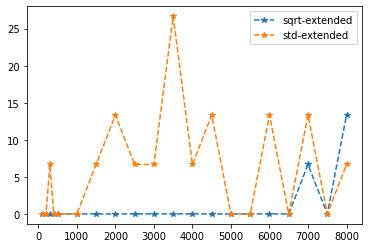

In [8]:
plt.plot(Ts, rts_fl32_gpu_extended_sqrt_par_ell,'--*', label="sqrt-extended")
plt.plot(Ts, rts_fl32_gpu_extended_std_par_ell,'--*', label="std-extended")
plt.legend();

In [9]:
with np.load("new_outputs/ell_float32_cubature_std_runtime15.npz") as loaded:
    rts_fl32_ICKS_std_par_ell = loaded["gpu_ICKS_std_par_ell"]

with np.load("new_outputs/ell_float32_cubature_sqrt_runtime15.npz") as loaded:
    rts_fl32_ICKS_sqrt_par_ell = loaded["gpu_ICKS_sqrt_par_ell"]

In [10]:
rts_fl32_gpu_cubature_sqrt_par_ell = np.mean(np.isnan(rts_fl32_ICKS_sqrt_par_ell),axis=1)*100
rts_fl32_gpu_cubature_std_par_ell = np.mean(np.isnan(rts_fl32_ICKS_std_par_ell),axis=1)*100

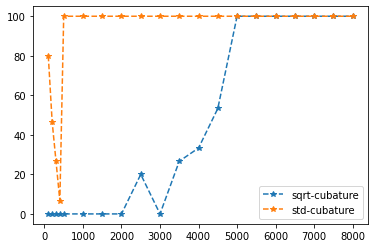

In [13]:
plt.plot(Ts, rts_fl32_gpu_cubature_sqrt_par_ell,'--*', label="sqrt-cubature")
plt.plot(Ts, rts_fl32_gpu_cubature_std_par_ell,'--*', label="std-cubature")
plt.legend();

# Previous results

In [ ]:
with np.load("ell_float32_cubature_runtime15.npz") as loaded:
    fl32_ICKS_std_par_ell = loaded["gpu_ICKS_std_par_ell"]
    fl32_ICKS_sqrt_par_ell = loaded["gpu_ICKS_sqrt_par_ell"]

In [3]:
with np.load("ell_float32_extended_runtime15.npz") as loaded:
    fl32_IEKS_std_par_ell = loaded["gpu_IEKS_std_par_ell"]
    fl32_IEKS_sqrt_par_ell = loaded["gpu_IEKS_sqrt_par_ell"]

In [15]:
fl32_gpu_cubature_sqrt_par_ell = np.mean(np.isnan(fl32_ICKS_sqrt_par_ell),axis=1)*100
fl32_gpu_cubature_std_par_ell = np.mean(np.isnan(fl32_ICKS_std_par_ell),axis=1)*100


In [47]:
fl32_gpu_extended_sqrt_par_ell = np.mean(np.isnan(fl32_IEKS_sqrt_par_ell),axis=1)*100
fl32_gpu_extended_std_par_ell = np.mean(np.isnan(fl32_IEKS_std_par_ell),axis=1)*100


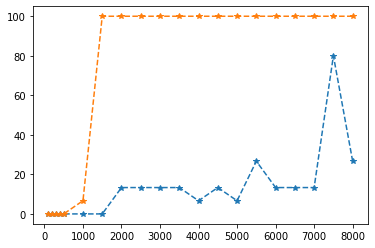

In [21]:
plt.plot(Ts, fl32_gpu_cubature_sqrt_par_ell,'--*')
plt.plot(Ts, fl32_gpu_cubature_std_par_ell,'--*')

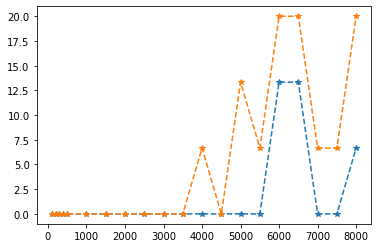

In [48]:
plt.plot(Ts, fl32_gpu_extended_sqrt_par_ell,'--*')
plt.plot(Ts, fl32_gpu_extended_std_par_ell,'--*')

In [14]:
data_rts_cubature = np.stack([Ts,
                 rts_fl32_gpu_cubature_sqrt_par_ell,
                 rts_fl32_gpu_cubature_std_par_ell],
                 axis=1)

columns = ["observations",
          "fl32_gpu_cubature_sqrt_par_ell",
          "fl32_gpu_cubature_std_par_ell"]

df1 = pd.DataFrame(data=data_rts_cubature, columns=columns)
# df1.to_csv("new_outputs/rts_fl32_cubature_ell.csv")

In [15]:
data_rts_extended = np.stack([Ts,
                 rts_fl32_gpu_extended_sqrt_par_ell,
                 rts_fl32_gpu_extended_std_par_ell],
                 axis=1)

columns = ["observations",
          "fl32_gpu_extended_sqrt_par_ell",
          "fl32_gpu_extended_std_par_ell"]

df2 = pd.DataFrame(data=data_rts_extended, columns=columns)
# df2.to_csv("new_outputs/rts_fl32_extended_ell.csv")